In [ ]:
#@markdown ## <font color="ffc800"> **Check GPU type.** 👁️
#@markdown ---
#@markdown #### A higher capable GPU can lead to faster training speeds. By default, you will have a <font color="orange">**Tesla T4**</font>.
!nvidia-smi

In [1]:
!pip install --upgrade pip
!pip install tensorflow
!pip install gym-trading-env
!pip install scikit-learn
!pip install yfinance==0.2.38
!pip install finta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 36.8 MB/s eta 0:00:0000:01
  Attempting uninstall: pip
    Found existing installation: pip 23.3.2
    Uninstalling pip-23.3.2:
      Successfully uninstalled pip-23.3.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 44.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.2.1
    Uninstalling keras-3.2.1:
      Successfully uninstalled keras-3.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 68.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Crea

In [4]:
!pip install finta

In [2]:
!pip show gym-trading-env

Name: gym-trading-env
Version: 0.3.3
Summary: A simple, easy, customizable Open IA Gym environments for trading.
Home-page: https://github.com/ClementPerroud/Gym-Trading-Env
Author: 
Author-email: Clement Perroud <clement.perroud.pro@gmail.com>
License: MIT License
        
        Copyright (c) [year] [fullname]
        
        Permission is hereby granted, free of charge, to any person obtaining a copy
        of this software and associated documentation files (the "Software"), to deal
        in the Software without restriction, including without limitation the rights
        to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
        copies of the Software, and to permit persons to whom the Software is
        furnished to do so, subject to the following conditions:
        
        The above copyright notice and this permission notice shall be included in all
        copies or substantial portions of the Software.
        
        THE SOFTWARE IS PROVIDED "

In [6]:
!pip show keras tensorflow scikit-learn

Name: keras
Version: 2.15.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /opt/conda/lib/python3.10/site-packages
Requires: 
Required-by: keras-tuner, tensorflow
---
Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /opt/conda/lib/python3.10/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: explainable-ai-sdk, tensorflow-cloud, tensorflow-decision-forests, tensorflow-serving-api, tensorflow-text, tf_keras, witwidget
---
Name: scikit-learn
Version: 1.2.2
Su

In [1]:
import gym
import gym_trading_env

print("gym-trading-env version:", gym_trading_env.__version__)


ModuleNotFoundError: No module named 'gym_trading_env'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import gymnasium as gym


from stable_baselines3 import A2C

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import gymnasium as gym

from gym_trading_env.downloader import download
import datetime

!mkdir -p /kaggle/working/data
download(exchange_names = ['huobi'],
         symbols= ['ETH/USDT'],
         timeframe= '1h',
         dir= '/kaggle/working/data',
         since= datetime.datetime(year=2020, month=1, day=1),
         #until=datetime.datetime(year=2024, month=4, day=1),
)

ETH/USDT downloaded from huobi and stored at /kaggle/working/data/huobi-ETHUSDT-1h.pkl


# 1 h 4 h и т.д.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Задаем тикер для S&P 500, который обычно SPY или ^GSPC
ticker = "GC=F"

# Создаем объект Ticker
sp_data = yf.Ticker(ticker)

# Получаем исторические данные с начала 2023 года с часовым интервалом
data = sp_data.history(start="2023-01-01", interval="60m")

# Переименование столбцов
data.rename(columns={
    'Open': 'open',
    'High': 'high',
    'Low': 'low',
    'Close': 'close',
    'Volume': 'volume'
}, inplace=True)

# Добавление столбца 'date_close' с копией индекса 'date'
data['date_close'] = data.index

# Просмотр преобразованных данных
print(data.head())

# Сохранение данных в CSV
data.to_csv('/kaggle/working/sp500_daily.csv', index=False)  # index=False, если индекс не нужен в CSV
data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Задаем тикер для S&P 500, который обычно SPY или ^GSPC
#ticker = "BTC-USD"
#ticker = "^GSPC"
ticker = "GC=F"
#ticker = "CL=F"
# Создаем объект Ticker
sp_data = yf.Ticker(ticker)

# Получаем исторические данные за весь доступный период с дневным интервалом
data = sp_data.history(period="max", interval="1d")
#data = sp_data.history(start="1990-01-01", interval="1d")
#data = sp_data.history(start="2023-01-01", interval="60m")
data.rename(columns={
    'Open': 'open',
    'High': 'high',
    'Low': 'low',
    'Close': 'close',
    'Volume': 'volume',
    'Dividends': 'dividends',
    'Stock Splits': 'stock_splits',
    'date_close': 'date_close'
}, inplace=True)

# Удаление столбцов 'dividends' и 'stock_splits', если они не нужны для анализа
#data.drop(columns=['dividends', 'stock_splits'], inplace=True)
# Добавление столбца 'date_close' с копией индекса 'date'
data['date_close'] = data.index
data.drop(columns=['dividends', 'stock_splits'], inplace=True)
# Просмотр преобразованных данных
print(data.head())

# Сохранение данных в CSV
data.to_csv('/kaggle/working/sp500_daily.csv', index=False)  # index=False, если индекс не нужен в CSV
data

                                 open        high         low       close  \
Date                                                                        
2000-08-30 00:00:00-04:00  273.899994  273.899994  273.899994  273.899994   
2000-08-31 00:00:00-04:00  274.799988  278.299988  274.799988  278.299988   
2000-09-01 00:00:00-04:00  277.000000  277.000000  277.000000  277.000000   
2000-09-05 00:00:00-04:00  275.799988  275.799988  275.799988  275.799988   
2000-09-06 00:00:00-04:00  274.200012  274.200012  274.200012  274.200012   

                           volume                date_close  
Date                                                         
2000-08-30 00:00:00-04:00       0 2000-08-30 00:00:00-04:00  
2000-08-31 00:00:00-04:00       0 2000-08-31 00:00:00-04:00  
2000-09-01 00:00:00-04:00       0 2000-09-01 00:00:00-04:00  
2000-09-05 00:00:00-04:00       2 2000-09-05 00:00:00-04:00  
2000-09-06 00:00:00-04:00       0 2000-09-06 00:00:00-04:00  


,open,high,low,close,volume,date_close
Date,,,,,,
2000-08-30 00:00:00-04:00,273.899994,273.899994,273.899994,273.899994,0,2000-08-30 00:00:00-04:00
2000-08-31 00:00:00-04:00,274.799988,278.299988,274.799988,278.299988,0,2000-08-31 00:00:00-04:00
2000-09-01 00:00:00-04:00,277.000000,277.000000,277.000000,277.000000,0,2000-09-01 00:00:00-04:00
2000-09-05 00:00:00-04:00,275.799988,275.799988,275.799988,275.799988,2,2000-09-05 00:00:00-04:00
2000-09-06 00:00:00-04:00,274.200012,274.200012,274.200012,274.200012,0,2000-09-06 00:00:00-04:00
...,...,...,...,...,...,...
2024-06-10 00:00:00-04:00,2290.600098,2309.300049,2290.500000,2307.699951,69,2024-06-10 00:00:00-04:00
2024-06-11 00:00:00-04:00,2300.000000,2314.100098,2300.000000,2307.500000,871,2024-06-11 00:00:00-04:00
2024-06-12 00:00:00-04:00,2314.899902,2338.699951,2310.300049,2336.000000,132,2024-06-12 00:00:00-04:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Задаем тикер для S&P 500, который обычно SPY или ^GSPC
#ticker = "^GSPC"
#ticker = "^SPY"
# Создаем объект Ticker
sp_data = yf.Ticker(ticker)

# Получаем исторические данные за весь доступный период с дневным интервалом
data = sp_data.history(period="max", interval="60m")

data.rename(columns={
    'Open': 'open',
    'High': 'high',
    'Low': 'low',
    'Close': 'close',
    'Volume': 'volume',
    'date_close': 'date_close'
}, inplace=True)

# Удаление столбцов 'dividends' и 'stock_splits', если они не нужны для анализа
#data.drop(columns=['dividends', 'stock_splits'], inplace=True)
# Добавление столбца 'date_close' с копией индекса 'date'
data['date_close'] = data.index

# Просмотр преобразованных данных
print(data.head())

# Сохранение данных в CSV
data.to_csv('/kaggle/working/sp500_daily.csv', index=False)  # index=False, если индекс не нужен в CSV
data

# Подготовка данных с MACD + RSI на 9 входов

In [4]:


import pandas as pd
from finta import TA

# Путь к файлу
#file_path = '/kaggle/working/sp500_daily.csv'
file_path = '/kaggle/working/data/huobi-ETHUSDT-1h.pkl'
# Загрузка данных из файла
data = pd.read_pickle(file_path)
#data = pd.read_csv(file_path)
data.dropna(inplace=True)  # Удаление строк с пропущенными значениями

# Переименование столбцов в соответствии с требованиями Finta
data.columns = ['open', 'high', 'low', 'close', 'volume', 'date_close']

# Установка столбца даты открытия в качестве индекса
data.index = pd.to_datetime(data['date_close'], utc=True)
data.drop(columns=['date_close'], inplace=True)  # Удаление ненужного столбца

# Удаление временной зоны
data.index = data.index.tz_localize(None)


# Расчет технических индикаторов
data['obv'] = TA.OBV(data)
data['mfi'] = TA.MFI(data)
bollinger = TA.BBANDS(data)
data['bollinger_upper'] = bollinger['BB_UPPER']
data['bollinger_middle'] = bollinger['BB_MIDDLE']
data['bollinger_lower'] = bollinger['BB_LOWER']
data['roc'] = TA.ROC(data)

# Рассчитываем стохастический осциллятор и добавляем в DataFrame
data['stoch_k'] = TA.STOCH(data)
data['stoch_d'] = TA.STOCHD(data)
data['vwap'] = TA.VWAP(data)

macd_values = TA.MACD(data)
data['macd'] = macd_values['MACD']
data['macd_signal'] = macd_values['SIGNAL']
data['macd_hist'] = macd_values['MACD'] - macd_values['SIGNAL']

data['rsi'] = TA.RSI(data)

fpp = TA.PIVOT_FIB(data)
data['pivot'] = fpp['pivot']
data['s1'] = fpp['s1']
data['s2'] = fpp['s2']
data['s3'] = fpp['s3']
data['r1'] = fpp['r1']
data['r2'] = fpp['r2']
data['r3'] = fpp['r3']
data.dropna(inplace=True)
data

,open,high,low,close,volume,obv,mfi,bollinger_upper,bollinger_middle,bollinger_lower,...,macd_signal,macd_hist,rsi,pivot,s1,s2,s3,r1,r2,r3
date_close,,,,,,,,,,,,,,,,,,,,,
2020-01-01 21:00:00,131.88,132.24,131.68,132.15,6486.249190,6.983973e+04,75.703253,132.917368,131.1635,129.409632,...,0.235575,0.061309,64.528279,131.920000,131.698440,131.561560,131.340000,132.141560,132.278440,132.500000
2020-01-01 22:00:00,132.17,132.35,131.66,131.78,7816.579777,6.202315e+04,75.384501,132.976830,131.2205,129.464170,...,0.242430,0.027101,57.417357,132.023333,131.809413,131.677253,131.463333,132.237253,132.369413,132.583333
2020-01-01 23:00:00,131.79,131.79,129.94,130.30,20002.611452,4.202054e+04,68.772269,132.990392,131.1925,129.394608,...,0.222974,-0.077105,38.934904,131.930000,131.666420,131.503580,131.240000,132.193580,132.356420,132.620000
2020-01-02 00:00:00,130.31,130.84,129.72,130.69,9964.581162,5.198512e+04,62.935442,132.968535,131.2185,129.468465,...,0.193149,-0.118420,44.046228,130.676667,129.969967,129.533367,128.826667,131.383367,131.819967,132.526667
2020-01-02 01:00:00,130.68,130.74,130.24,130.64,7074.222738,4.491090e+04,63.200834,132.947149,131.2405,129.533851,...,0.157382,-0.142224,43.543018,130.416667,129.988827,129.724507,129.296667,130.844507,131.108827,131.536667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-12 05:00:00,2541.09,2551.71,2534.82,2539.21,614.988837,5.953975e+06,34.356466,2695.864857,2600.1020,2504.339143,...,-16.725439,-7.683182,33.397877,2543.103333,2533.094933,2526.911733,2516.903333,2553.111733,2559.294933,2569.303333
2024-08-12 06:00:00,2538.94,2554.82,2535.23,2553.95,758.606686,5.954733e+06,40.998622,2682.768184,2593.5910,2504.413816,...,-18.122919,-5.589920,38.929251,2541.913333,2535.461353,2531.475313,2525.023333,2548.365313,2552.351353,2558.803333
2024-08-12 07:00:00,2553.79,2561.99,2541.83,2552.70,605.874441,5.954127e+06,40.578154,2669.444824,2587.4395,2505.434176,...,-19.097774,-3.899420,38.636204,2548.000000,2540.516620,2535.893380,2528.410000,2555.483380,2560.106620,2567.590000


# Подготовка ДАТАСЕТА с MACD + RSI + FIB(FPP)

In [5]:


# Сначала убедимся, что нет нулевых значений в столбце volume, чтобы избежать деления на ноль
#data = data[data['volume'] != 0]
data = data[(data['volume'] != 0) & (data['rsi'] != 0)]

# Обновляем список признаков для включения новых данных c ФИБАНАЧЧИ
#features = ['open', 'high', 'low', 'close', 'volume', 'macd', 'macd_signal', 'macd_hist', 'rsi', 'pivot', 's1', 's2', 's3', 'r1', 'r2', 'r3']
# Обновляем список признаков для включения новых данных
#features = ['open', 'high', 'low', 'close', 'volume', 'macd', 'macd_signal', 'macd_hist', 'rsi', 'pivot', 's1', 's2', 's3', 'r1', 'r2', 'r3', 'obv', 'mfi', 'bollinger_upper', 'bollinger_middle', 'bollinger_lower', 'roc', 'stoch_k', 'stoch_d', 'vwap']
#features = ['open', 'high', 'low', 'close', 'volume', 'macd', 'macd_signal', 'macd_hist', 'rsi', 'pivot', 's1', 's2', 's3', 'r1', 'r2', 'r3', 'obv', 'mfi', 'roc', 'stoch_k', 'stoch_d', 'vwap']
# Обновляем список признаков для включения новых данных
#features = ['open', 'high', 'low', 'close', 'volume', 'macd', 'macd_signal', 'macd_hist', 'rsi'] #БЕЗ ФИБОНАЧЧИ
#features = ['open', 'high', 'low', 'close', 'volume', 'macd', 'macd_signal', 'macd_hist', 'rsi', 'obv', 'mfi', 'roc', 'vwap']
features = ['open', 'high', 'low', 'close', 'volume', 'macd_signal', 'macd_hist', 'rsi', 'mfi', 'roc', 'stoch_d']
#Обновляем список признаков для включения новых данных
# Определяем точку разделения данных на обучающую и тестовую выборки (99% от всех данных)
split_index = int(len(data) * 0.8)

# Создаем обучающую выборку
data_train = data[features].iloc[:split_index]

# Создаем тестовую выборку
data_test = data[features].iloc[split_index:]

# Печатаем первые строки обучающей выборки для проверки
print(data_train.head())

# Печатаем первые строки тестовой выборки для проверки
print(data_test.head())
data_train

                       open    high     low   close        volume  \
date_close                                                          
2020-01-01 21:00:00  131.88  132.24  131.68  132.15   6486.249190   
2020-01-01 22:00:00  132.17  132.35  131.66  131.78   7816.579777   
2020-01-01 23:00:00  131.79  131.79  129.94  130.30  20002.611452   
2020-01-02 00:00:00  130.31  130.84  129.72  130.69   9964.581162   
2020-01-02 01:00:00  130.68  130.74  130.24  130.64   7074.222738   

                     macd_signal  macd_hist        rsi        mfi       roc  \
date_close                                                                    
2020-01-01 21:00:00     0.235575   0.061309  64.528279  75.703253  1.373121   
2020-01-01 22:00:00     0.242430   0.027101  57.417357  75.384501  1.244622   
2020-01-01 23:00:00     0.222974  -0.077105  38.934904  68.772269 -0.290787   
2020-01-02 00:00:00     0.193149  -0.118420  44.046228  62.935442 -0.030597   
2020-01-02 01:00:00     0.157382  -0.14222

,open,high,low,close,volume,macd_signal,macd_hist,rsi,mfi,roc,stoch_d
date_close,,,,,,,,,,,
2020-01-01 21:00:00,131.88,132.24,131.68,132.15,6486.249190,0.235575,0.061309,64.528279,75.703253,1.373121,68.789809
2020-01-01 22:00:00,132.17,132.35,131.66,131.78,7816.579777,0.242430,0.027101,57.417357,75.384501,1.244622,66.135881
2020-01-01 23:00:00,131.79,131.79,129.94,130.30,20002.611452,0.222974,-0.077105,38.934904,68.772269,-0.290787,48.613713
2020-01-02 00:00:00,130.31,130.84,129.72,130.69,9964.581162,0.193149,-0.118420,44.046228,62.935442,-0.030597,34.161458
2020-01-02 01:00:00,130.68,130.74,130.24,130.64,7074.222738,0.157382,-0.142224,43.543018,63.200834,-0.699301,23.128886
...,...,...,...,...,...,...,...,...,...,...,...
2023-09-10 12:00:00,1622.13,1626.53,1619.71,1624.43,272.258384,-2.103088,-0.761932,36.577936,23.165199,-0.673821,25.529243
2023-09-10 13:00:00,1624.43,1626.68,1624.27,1625.86,179.993519,-2.226275,-0.492746,40.889605,26.128397,-0.378667,30.848930
2023-09-10 14:00:00,1625.94,1628.52,1623.87,1627.01,244.913376,-2.277402,-0.204509,44.176377,32.869750,-0.253809,40.819801


In [12]:
data_train

,open,high,low,close,volume,macd_signal,macd_hist,rsi,mfi,roc,stoch_d
date_close,,,,,,,,,,,
2020-01-01 21:00:00,131.88,132.24,131.68,132.15,6486.249190,0.235575,0.061309,64.528279,75.703253,1.373121,68.789809
2020-01-01 22:00:00,132.17,132.35,131.66,131.78,7816.579777,0.242430,0.027101,57.417357,75.384501,1.244622,66.135881
2020-01-01 23:00:00,131.79,131.79,129.94,130.30,20002.611452,0.222974,-0.077105,38.934904,68.772269,-0.290787,48.613713
2020-01-02 00:00:00,130.31,130.84,129.72,130.69,9964.581162,0.193149,-0.118420,44.046228,62.935442,-0.030597,34.161458
2020-01-02 01:00:00,130.68,130.74,130.24,130.64,7074.222738,0.157382,-0.142224,43.543018,63.200834,-0.699301,23.128886
...,...,...,...,...,...,...,...,...,...,...,...
2023-09-05 19:00:00,1636.21,1637.81,1633.44,1636.64,197.037785,0.578337,1.253726,57.699871,69.530462,0.915033,62.202290
2023-09-05 20:00:00,1636.65,1639.21,1631.98,1632.36,239.310545,0.789990,0.846612,51.415045,64.067680,0.459105,52.837561
2023-09-05 21:00:00,1632.36,1633.61,1626.93,1629.93,561.978536,0.886185,0.384782,48.204677,59.749397,0.337345,44.106647


# Скалер -1,1 

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

data_train_scale = scaler.fit_transform(data_train)

import joblib
!mkdir -p /kaggle/working/SPX/1d/keras2/

# Путь, куда будет сохранен scaler
scaler_filename = '/kaggle/working/SPX/1d/keras2/scaler_btc1h.save'

# Сохранение scaler
joblib.dump(scaler, scaler_filename)

['/kaggle/working/SPX/1d/keras2/scaler_btc1h.save']

# Входные данные на 9 ключей и 3 выход close

In [ ]:
data_train_scale

# Модель с Attention

2024-08-12 08:28:46.143499: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-12 08:28:46.143636: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-12 08:28:46.272066: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Shape of X: (40281, 100, 11)
Shape of y: (40281, 1)
Epoch 1/100


W0000 00:00:1723451339.702534      34 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "Tesla P100-PCIE-16GB" frequency: 1328 num_cores: 56 environment { key: "architecture" value: "6.0" } environment { key: "cuda" value: "12020" } environment { key: "cudnn" value: "8904" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 4194304 shared_memory_size_per_multiprocessor: 65536 memory_size: 16266690560 bandwidth: 732160000 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }
I0000 00:00:1723451340.857398     206 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


799/806 [============================>.] - ETA: 0s - loss: 0.0024

W0000 00:00:1723451347.460658      34 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "Tesla P100-PCIE-16GB" frequency: 1328 num_cores: 56 environment { key: "architecture" value: "6.0" } environment { key: "cuda" value: "12020" } environment { key: "cudnn" value: "8904" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 4194304 shared_memory_size_per_multiprocessor: 65536 memory_size: 16266690560 bandwidth: 732160000 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


806/806 [==============================] - 10s 8ms/step - loss: 0.0024 - val_loss: 1.5835e-04
Epoch 2/100
806/806 [==============================] - 6s 8ms/step - loss: 6.7163e-04 - val_loss: 1.5868e-04
Epoch 3/100
806/806 [==============================] - 6s 8ms/step - loss: 5.2707e-04 - val_loss: 9.9490e-05
Epoch 4/100
806/806 [==============================] - 6s 8ms/step - loss: 4.0591e-04 - val_loss: 5.9853e-05
Epoch 5/100
806/806 [==============================] - 6s 8ms/step - loss: 3.3733e-04 - val_loss: 9.1461e-05
Epoch 6/100
806/806 [==============================] - 6s 7ms/step - loss: 3.3332e-04 - val_loss: 8.3852e-05
Epoch 7/100
806/806 [==============================] - 6s 7ms/step - loss: 2.7424e-04 - val_loss: 4.6160e-05
Epoch 8/100
806/806 [==============================] - 6s 7ms/step - loss: 2.4556e-04 - val_loss: 2.4181e-04
Epoch 9/100
806/806 [==============================] - 6s 8ms/step - loss: 2.3442e-04 - val_loss: 1.4429e-04
Epoch 10/100
806/806 [============

W0000 00:00:1723451947.308357      34 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "Tesla P100-PCIE-16GB" frequency: 1328 num_cores: 56 environment { key: "architecture" value: "6.0" } environment { key: "cuda" value: "12020" } environment { key: "cudnn" value: "8904" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 4194304 shared_memory_size_per_multiprocessor: 65536 memory_size: 16266690560 bandwidth: 732160000 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


252/252 [==============================] - 1s 3ms/step
MAE: 2.4948032041912033e-06
RMSE: 3.889166027047224e-06
Direction Accuracy: 100.0%


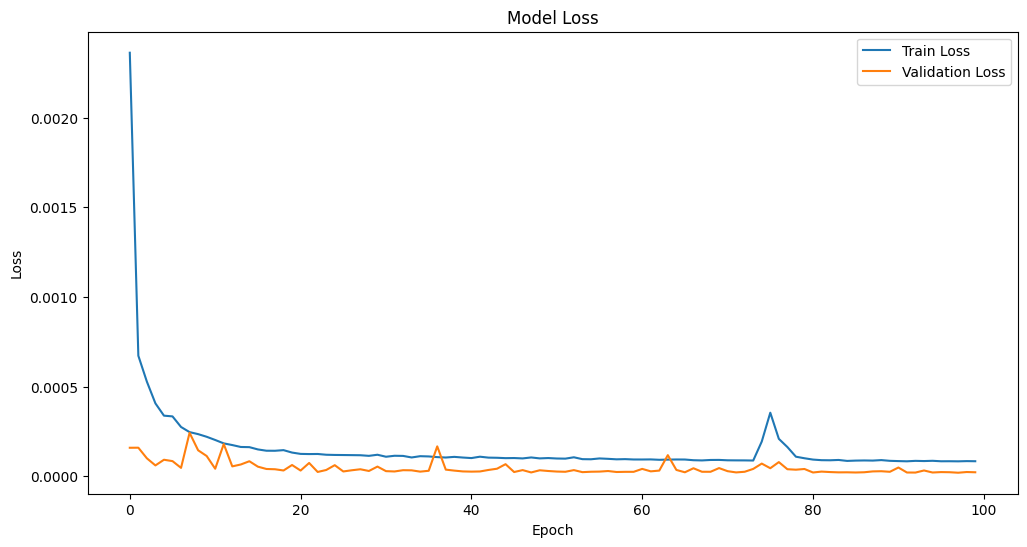

252/252 [==============================] - 1s 3ms/step


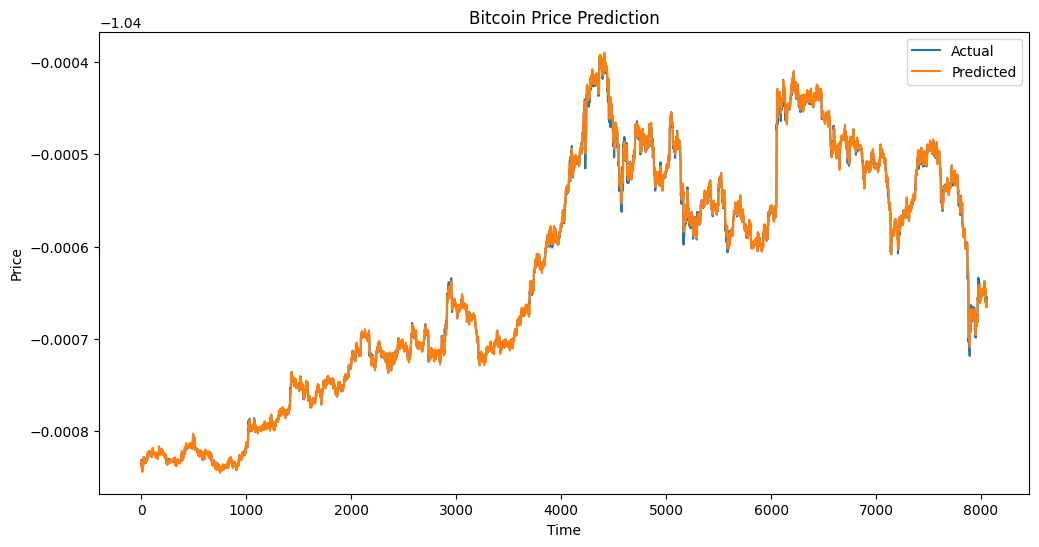

In [6]:


import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling1D
from tensorflow.keras.layers import LSTM, Dense, Attention, Input, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


# Сначала убедимся, что нет нулевых значений в столбце volume, чтобы избежать деления на ноль
#data = data[data['volume'] != 0]
data = data[(data['volume'] != 0) & (data['rsi'] != 0)]

# Обновляем список признаков для включения новых данных c ФИБАНАЧЧИ
#features = ['open', 'high', 'low', 'close', 'volume', 'macd', 'macd_signal', 'macd_hist', 'rsi', 'pivot', 's1', 's2', 's3', 'r1', 'r2', 'r3']
# Обновляем список признаков для включения новых данных
#features = ['open', 'high', 'low', 'close', 'volume', 'macd', 'macd_signal', 'macd_hist', 'rsi', 'pivot', 's1', 's2', 's3', 'r1', 'r2', 'r3', 'obv', 'mfi', 'bollinger_upper', 'bollinger_middle', 'bollinger_lower', 'roc', 'stoch_k', 'stoch_d', 'vwap']
#features = ['open', 'high', 'low', 'close', 'volume', 'macd', 'macd_signal', 'macd_hist', 'rsi', 'pivot', 's1', 's2', 's3', 'r1', 'r2', 'r3', 'obv', 'mfi', 'roc', 'stoch_k', 'stoch_d', 'vwap']
# Обновляем список признаков для включения новых данных
#features = ['open', 'high', 'low', 'close', 'volume', 'macd', 'macd_signal', 'macd_hist', 'rsi'] #БЕЗ ФИБОНАЧЧИ
#features = ['open', 'high', 'low', 'close', 'volume', 'macd', 'macd_signal', 'macd_hist', 'rsi', 'obv', 'mfi', 'roc', 'vwap']
features = ['open', 'high', 'low', 'close', 'volume', 'macd_signal', 'macd_hist', 'rsi', 'mfi', 'roc', 'stoch_d']


# 2. Создание модели с механизмом внимания
def create_attention_model(input_shape):
    inputs = Input(shape=input_shape)
    lstm_out = LSTM(64, return_sequences=True, activation='tanh')(inputs)
    attention = Attention()([lstm_out, lstm_out])
    concat = Concatenate()([lstm_out, attention])
    
    # Изменение здесь: добавляем GlobalAveragePooling1D для уменьшения временного измерения
    pooled = GlobalAveragePooling1D()(concat)
    
    dense1 = Dense(32, activation='tanh')(pooled)
    output = Dense(1, activation='linear')(dense1)
    
    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

def train_model(X_train, y_train, X_val=None, y_val=None, epochs=100, batch_size=32, patience=10):
    model = create_attention_model(X_train.shape[1:])
    
    callbacks = [
        EarlyStopping(patience=patience, restore_best_weights=True)
    ]
    
    if X_val is not None and y_val is not None:
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                            validation_data=(X_val, y_val), callbacks=callbacks, verbose=1)
    else:
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                            validation_split=0.2, callbacks=callbacks, verbose=1)
    
    return model, history

def evaluate_model(model, X_test, y_test, scaler):
    predictions = model.predict(X_test)
    
    # Получаем параметры скалера
    feature_range = scaler.feature_range
    scale = (feature_range[1] - feature_range[0]) / (scaler.data_max_ - scaler.data_min_)
    min_ = feature_range[0] - scaler.data_min_ * scale
    
    # Обратное масштабирование только для 'close'
    close_index = features.index('close')
    y_test_inv = (y_test * scale[close_index]) + min_[close_index]
    predictions_inv = (predictions * scale[close_index]) + min_[close_index]
    
    mae = np.mean(np.abs(y_test_inv - predictions_inv))
    rmse = np.sqrt(np.mean((y_test_inv - predictions_inv)**2))
    
    # Оценка направления изменения
    direction_accuracy = np.mean(np.sign(y_test_inv - X_test[:, -1, close_index]) == 
                                 np.sign(predictions_inv - X_test[:, -1, close_index]))
    
    return mae, rmse, direction_accuracy

# 1. Подготовка данных
def prepare_data(data, look_back=100, forecast_horizon=1, test_size=0.2):
    # Разделение на обучающую и тестовую выборки
    split = int((1 - test_size) * len(data))
    train_data = data[:split]
    test_data = data[split:]

    # Нормализация данных
    scaler = MinMaxScaler(feature_range=(-1, 1))
    train_scaled = scaler.fit_transform(train_data[features])
    test_scaled = scaler.transform(test_data[features])
    
    def create_sequences(scaled_data):
        X, y = [], []
        for i in range(len(scaled_data) - look_back - forecast_horizon + 1):
            X.append(scaled_data[i:(i + look_back)])
            y.append(scaled_data[i + look_back : i + look_back + forecast_horizon, features.index('close')])
        return np.array(X), np.array(y)
    
    X_train, y_train = create_sequences(train_scaled)
    X_test, y_test = create_sequences(test_scaled)
    
    return X_train, y_train, X_test, y_test, scaler

# Основной код
X_train, y_train, X_test, y_test, scaler = prepare_data(data)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

model, history = train_model(X_train, y_train)
mae, rmse, direction_accuracy = evaluate_model(model, X_test, y_test, scaler)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"Direction Accuracy: {direction_accuracy * 100}%")

# Визуализация результатов
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Визуализация предсказаний
predictions = model.predict(X_test)

# Получаем параметры скалера
feature_range = scaler.feature_range
scale = (feature_range[1] - feature_range[0]) / (scaler.data_max_ - scaler.data_min_)
min_ = feature_range[0] - scaler.data_min_ * scale

# Обратное масштабирование только для 'close'
close_index = features.index('close')
predictions_inv = (predictions * scale[close_index]) + min_[close_index]
y_test_inv = (y_test * scale[close_index]) + min_[close_index]

plt.figure(figsize=(12, 6))
plt.plot(y_test_inv[:, -1], label='Actual')  # Последнее значение для каждого прогноза
plt.plot(predictions_inv[:, -1], label='Predicted')  # Последнее значение для каждого прогноза
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

import joblib

# Путь, куда будет сохранен scaler
scaler_filename = '/kaggle/working/scaler_eth1hATNN.save'

# Сохранение scaler
joblib.dump(scaler, scaler_filename)
model.save('/kaggle/working/ETH1H_5Mpar11ENTRY1barsoutyfin100IN100epochATNN.keras')

In [17]:
import joblib

# Путь, куда будет сохранен scaler
scaler_filename = '/kaggle/working/scaler_btc1hATNN.save'

# Сохранение scaler
joblib.dump(scaler, scaler_filename)
model.save('/kaggle/working/BTC1H_5Mpar11ENTRY1barsoutyfin100IN100epochATNN.keras')

In [ ]:
# Создаем структуры данных X и Y
x = []
y = []

# Цикл для формирования данных входного окна и ответов
for i in range(40, len(data_train_scale)):
    x.append(data_train_scale[i-40:i])  # 100 последних доступных наблюдений до i
    y.append(data_train_scale[i, 3])     # Индекс 3 - это 'close', как предполагалось

# Преобразование списка в массив NumPy для последующей обработки
x, y = np.array(x), np.array(y)

# Изменяем форму x для добавления нового измерения, так как LSTM ожидает трехмерный тензор
# Теперь 'features' равно 9, так как у вас 9 признаков
x = np.reshape(x, (x.shape[0], x.shape[1], len(features)))  # Обновление из 5 признаков на 9

# Вывод формы массивов для проверки
print("Форма массива x:", x.shape)
print("Форма массива y:", y.shape)

# Подготвка данных под 16 входов и выход 5 баров CLose

In [6]:
x = []
y = []

# Цикл для формирования данных входного окна и ответов
look_back = 100  # Размер входного окна
look_forward = 4  # Количество прогнозируемых значений

for i in range(look_back, len(data_train_scale) - look_forward + 1):
    x.append(data_train_scale[i-look_back:i])  # 100 последних доступных наблюдений до i
    y.append(data_train_scale[i:i + look_forward, 3])  # Индекс 3 - это 'close', целевая переменная

# Преобразование списка в массив NumPy для последующей обработки
x, y = np.array(x), np.array(y)

# Изменяем форму x для добавления нового измерения, так как LSTM ожидает трехмерный тензор
# Обновляем число признаков в каждом входном окне
x = np.reshape(x, (x.shape[0], x.shape[1], len(features)))  # Теперь 'features' равно 16

# Вывод формы массивов для проверки
print("Форма массива x:", x.shape)
print("Форма массива y:", y.shape)



Форма массива x: (54736, 100, 11)
Форма массива y: (54736, 4)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Определение Residual Block
class ResidualBlock(tf.keras.layers.Layer):
    def __init__(self, model_dim):
        super(ResidualBlock, self).__init__()
        self.dense1 = layers.Dense(model_dim, activation='tanh')
        self.dense2 = layers.Dense(model_dim)
        
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return inputs + x

# Определение Positional Encoding Layer
class PositionalEncoding(layers.Layer):
    def __init__(self, max_position, model_dim):
        super(PositionalEncoding, self).__init__()
        self.pos_encoding = self.positional_encoding(max_position, model_dim)

    def positional_encoding(self, max_position, model_dim):
        angle_rads = self.get_angles(np.arange(max_position)[:, np.newaxis],
                                     np.arange(model_dim)[np.newaxis, :],
                                     model_dim)
        angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
        angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
        pos_encoding = angle_rads[np.newaxis, ...]
        return tf.cast(pos_encoding, dtype=tf.float32)

    def get_angles(self, pos, i, model_dim):
        angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(model_dim))
        return pos * angle_rates

    def call(self, inputs):
        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

# Определение улучшенной LSTM модели
def build_improved_lstm_model(input_shape, model_dim):
    inputs = layers.Input(shape=input_shape)
    
    # Positional Encoding
    x = PositionalEncoding(input_shape[0], model_dim)(inputs)
    
    # First LSTM Layer
    x = layers.LSTM(units=1280, activation='tanh', return_sequences=True)(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(model_dim)(x)  # Align dimensions
    x = ResidualBlock(model_dim)(x)
    
    # Second LSTM Layer
    x = layers.LSTM(units=1280, activation='tanh', return_sequences=True)(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(model_dim)(x)  # Align dimensions
    x = ResidualBlock(model_dim)(x)
    
    # Third LSTM Layer
    x = layers.LSTM(units=1280, activation='tanh', return_sequences=True)(x)
    x = layers.Dropout(0.4)(x)
    x = layers.Dense(model_dim)(x)  # Align dimensions
    x = ResidualBlock(model_dim)(x)
    
    # Fourth LSTM Layer
    x = layers.LSTM(units=1280, activation='tanh')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(model_dim)(x)  # Align dimensions
    x = ResidualBlock(model_dim)(x)
    
    # Output Layer
    outputs = layers.Dense(units=look_forward)(x)
    
    # Определение модели
    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# Параметры модели
input_shape = (x.shape[1], x.shape[2])
model_dim = input_shape[1]  # Размерность модели будет равна количеству признаков

# Создание модели
improved_lstm_model = build_improved_lstm_model(input_shape, model_dim)
improved_lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Вывод структуры модели
improved_lstm_model.summary()



# Модель 9 входов и прогноз 5 close вперед и батч нормализатор

In [ ]:
from keras.layers import Dense, Dropout, LSTM, BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam

# Инициализация модели
model = Sequential()
model.add(LSTM(units=200, activation='tanh', return_sequences=True, input_shape=(x.shape[1], x.shape[2])))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(LSTM(units=300, activation='tanh', return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(LSTM(units=500, activation='tanh', return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(LSTM(units=600, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Выходной слой
model.add(Dense(units=look_forward))

# Компиляция модели с использованием clipnorm и уменьшенной скоростью обучения
#optimizer = Adam(learning_rate=0.00001, clipvalue=1.0)
model.compile(optimizer='adam', loss='mean_squared_error')

# Вывод структуры модели
model.summary()




# Модель с нормализацией слоев

In [ ]:
from keras.layers import Dense, Dropout, LSTM, GroupNormalization
from keras.models import Sequential
from keras.optimizers import Adam

# Инициализация модели
model = Sequential()

# Добавление нормализационного слоя перед LSTM
model.add(GroupNormalization(groups=2, input_shape=(x.shape[1], x.shape[2])))

# Добавление слоев LSTM с Dropout и активацией tanh
model.add(LSTM(units=200, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(GroupNormalization(groups=2))

model.add(LSTM(units=300, activation='tanh', return_sequences=True))
model.add(Dropout(0.3))
model.add(GroupNormalization(groups=2))

model.add(LSTM(units=500, activation='tanh', return_sequences=True))
model.add(Dropout(0.4))
model.add(GroupNormalization(groups=2))

model.add(LSTM(units=600, activation='tanh'))
model.add(Dropout(0.5))
model.add(GroupNormalization(groups=2))

# Dense слой с количеством нейронов, равным количеству признаков
#model.add(Dense(units=len(features), activation='tanh'))

# Выходной слой без активации
model.add(Dense(units=look_forward))

# Компиляция модели
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Вывод структуры модели
model.summary()



In [ ]:
from keras.layers import Dense, Dropout, LSTM, BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop

# Инициализация модели
model = Sequential()
model.add(LSTM(units=200, activation='tanh', return_sequences=True, input_shape=(x.shape[1], x.shape[2])))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(LSTM(units=300, activation='tanh', return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(LSTM(units=500, activation='tanh', return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(LSTM(units=600, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Выходной слой
model.add(Dense(units=look_forward))

# Компиляция модели с использованием clipnorm и уменьшенной скоростью обучения
#optimizer = Adam(learning_rate=0.00001)
#model.compile(optimizer=optimizer, loss='mean_squared_error')
# Компиляция модели с использованием RMSprop и Huber Loss
optimizer = RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='huber')

# Вывод структуры модели
model.summary()

# Модель 16 входов и прогноз 5 close вперед 182к параметров

In [7]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
# Инициализация модели
model = Sequential()

# Добавление слоев LSTM с Dropout и активацией tanh
model.add(LSTM(units=200, activation='tanh', return_sequences=True, input_shape=(x.shape[1], x.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units=300, activation='tanh', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=500, activation='tanh', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=600, activation='tanh'))
model.add(Dropout(0.5))

# Dense слой с количеством нейронов, равным количеству признаков, с активацией tanh
#model.add(Dense(units=len(features), activation='tanh'))
model.add(Dense(units=look_forward))  # Изменение количества выходных единиц на 5
optimizer = Adam(learning_rate=0.001)
# Компиляция модели
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Вывод структуры модели
model.summary()

2024-06-02 16:38:36.973705: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-02 16:38:36.973820: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-02 16:38:37.081988: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 200)          169600    
                                                                 
 dropout (Dropout)           (None, 100, 200)          0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 300)          601200    
                                                                 
 dropout_1 (Dropout)         (None, 100, 300)          0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 500)          1602000   
                                                                 
 dropout_2 (Dropout)         (None, 100, 500)          0         
                                                                 
 lstm_3 (LSTM)               (None, 600)               2

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
# Инициализация модели
model = Sequential()

# Добавление слоев LSTM с Dropout и активацией tanh
model.add(LSTM(units=1000, activation='tanh', return_sequences=True, input_shape=(x.shape[1], x.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units=1000, activation='tanh', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=2500, activation='tanh', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=3000, activation='tanh'))
model.add(Dropout(0.5))

# Dense слой с количеством нейронов, равным количеству признаков, с активацией tanh
#model.add(Dense(units=len(features), activation='tanh'))
model.add(Dense(units=look_forward))  # Изменение количества выходных единиц на 5
optimizer = Adam(learning_rate=0.001)
# Компиляция модели
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Вывод структуры модели
model.summary()

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
# Инициализация модели
model = Sequential()

# Добавление слоев LSTM с Dropout и активацией tanh
model.add(LSTM(units=50, activation='tanh', return_sequences=True, input_shape=(x.shape[1], x.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='tanh', return_sequences=True, input_shape=(x.shape[1], x.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units=80, activation='tanh', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=90, activation='tanh', return_sequences=True, input_shape=(x.shape[1], x.shape[2])))
model.add(Dropout(0.3))

model.add(LSTM(units=100, activation='tanh', return_sequences=True, input_shape=(x.shape[1], x.shape[2])))
model.add(Dropout(0.4))

model.add(LSTM(units=110, activation='tanh', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='tanh'))
model.add(Dropout(0.5))

# Выходной слой
model.add(Dense(units=look_forward))  # Изменение количества выходных единиц на 5

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

# Вывод структуры модели
model.summary()

# Модель под 9 входов tanh

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

# Инициализация модели
model = Sequential()

# Добавление слоев LSTM с Dropout и активацией tanh
model.add(LSTM(units=10, activation='tanh', return_sequences=True, input_shape=(x.shape[1], x.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units=20, activation='tanh', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=30, activation='tanh', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=50, activation='tanh'))
model.add(Dropout(0.5))

# Выходной слой
model.add(Dense(units=1))

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

# Вывод структуры модели
model.summary()


In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

# Инициализация модели
model = Sequential()

# Добавление слоев LSTM с Dropout и активацией tanh
model.add(LSTM(units=200, activation='tanh', return_sequences=True, input_shape=(x.shape[1], x.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units=300, activation='tanh', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=500, activation='tanh', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=600, activation='tanh'))
model.add(Dropout(0.5))

# Выходной слой
model.add(Dense(units=1))

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

# Вывод структуры модели
model.summary()

# Обучение# 

Training with batch size: 32
Epoch 1/500


I0000 00:00:1717346344.095022     157 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1540/1540 [==============================] - 87s 51ms/step - loss: 0.0139 - val_loss: 2.7520e-04 - lr: 0.0010
Epoch 2/500
1540/1540 [==============================] - 78s 51ms/step - loss: 0.0033 - val_loss: 2.1829e-04 - lr: 0.0010
Epoch 3/500
1540/1540 [==============================] - 78s 51ms/step - loss: 0.0029 - val_loss: 0.0017 - lr: 0.0010
Epoch 4/500
1540/1540 [==============================] - 78s 50ms/step - loss: 0.0025 - val_loss: 5.2479e-04 - lr: 0.0010
Epoch 5/500
1540/1540 [==============================] - 78s 51ms/step - loss: 0.0021 - val_loss: 2.6689e-04 - lr: 0.0010
Epoch 6/500
1540/1540 [==============================] - 78s 51ms/step - loss: 0.0018 - val_loss: 2.6968e-04 - lr: 0.0010
Epoch 7/500
1540/1540 [==============================] - 78s 50ms/step - loss: 0.0016 - val_loss: 2.0297e-04 - lr: 0.0010
Epoch 8/500
1540/1540 [==============================] - 78s 51ms/step - loss: 0.0015 - val_loss: 3.6983e-04 - lr: 0.0010
Epoch 9/500
1540/1540 [=================

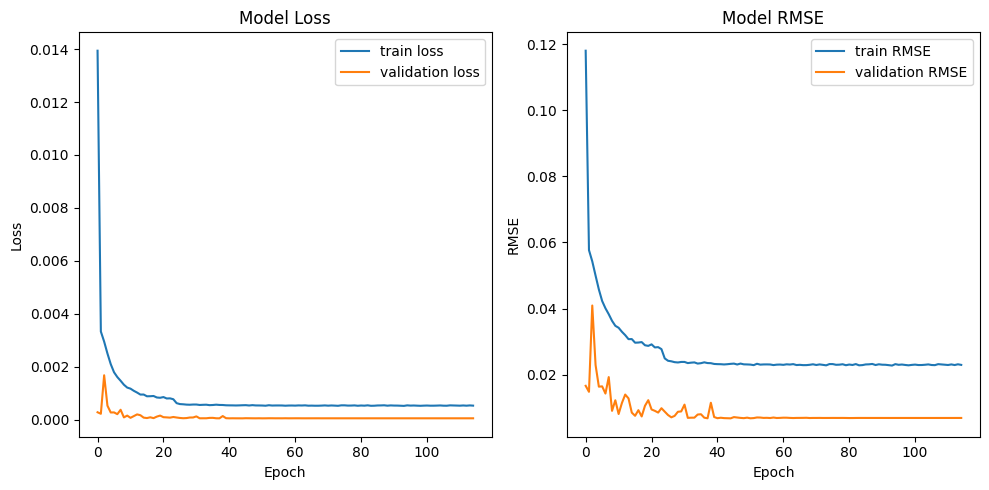

In [8]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback
import numpy as np

class RMSECallback(Callback):
    def on_train_begin(self, logs={}):
        self.train_rmse = []
        self.val_rmse = []

    def on_epoch_end(self, epoch, logs={}):
        train_rmse = np.sqrt(logs.get('loss'))
        val_rmse = np.sqrt(logs.get('val_loss'))
        self.train_rmse.append(train_rmse)
        self.val_rmse.append(val_rmse)
        print(f' — train_rmse: {train_rmse:.4f} — val_rmse: {val_rmse:.4f}')

# Настройка ранней остановки и уменьшения скорости обучения
early_stopping = EarlyStopping(monitor='val_loss', patience=70, restore_best_weights=True, start_from_epoch=10, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=15, min_lr=1e-8, verbose=1)
rmse_callback = RMSECallback()

# Обучение модели
batch_size = 32
print(f"Training with batch size: {batch_size}")
history = model.fit(
    x, y,
    epochs=500,
    batch_size=batch_size,
    validation_split=0.1,
    callbacks=[early_stopping, rmse_callback, reduce_lr],
    verbose=1
)

# Визуализация обучения
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(rmse_callback.train_rmse, label='train RMSE')
plt.plot(rmse_callback.val_rmse, label='validation RMSE')
plt.title('Model RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()


In [10]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Создание подграфиков
fig = make_subplots(rows=1, cols=2, subplot_titles=('Model Loss', 'Model RMSE'))

# Добавление данных потерь на первый подграфик
fig.add_trace(go.Scatter(x=list(range(len(history.history['loss']))), y=history.history['loss'], mode='lines', name='Train Loss'), row=1, col=1)
fig.add_trace(go.Scatter(x=list(range(len(history.history['val_loss']))), y=history.history['val_loss'], mode='lines', name='Validation Loss'), row=1, col=1)

# Добавление данных RMSE на второй подграфик
fig.add_trace(go.Scatter(x=list(range(len(rmse_callback.train_rmse))), y=rmse_callback.train_rmse, mode='lines', name='Train RMSE'), row=1, col=2)
fig.add_trace(go.Scatter(x=list(range(len(rmse_callback.val_rmse))), y=rmse_callback.val_rmse, mode='lines', name='Validation RMSE'), row=1, col=2)

# Обновление осей и макета
fig.update_xaxes(title_text='Epoch', row=1, col=1)
fig.update_yaxes(title_text='Loss', row=1, col=1)
fig.update_xaxes(title_text='Epoch', row=1, col=2)
fig.update_yaxes(title_text='RMSE', row=1, col=2)

# Обновление макета для общего вида
fig.update_layout(height=400, width=1200, title_text="Training and Validation Loss and RMSE", showlegend=True)
fig.show()


In [9]:
# Предполагается, что 'model' - это ваша обученная модель
model.save('/kaggle/working/SPX/1d/keras2/ETH1H_5Mpar11ENTRY4barsoutyfin100IN21epoch.keras')  # Сохраняет модель в единый файл HDF5

In [ ]:
# Функция сохранения метаданных
def save_model_metadata(model, optimizer, history, ticker, timeframe, train_size, val_size, output_dir):
    timestamp = time.strftime('%Y-%m-%d_%H-%M-%S')
    metadata_filename = f'{output_dir}/model_metadata_{timestamp}.json'
    model_config = model.to_json()
    optimizer_config = optimizer.get_config()
    metadata = {
        'model_structure': model_config,
        'optimizer_config': optimizer_config,
        'train_loss': history.history['loss'],
        'val_loss': history.history['val_loss'],
        'train_rmse': history.history['rmse'],
        'val_rmse': history.history['val_rmse'],
        'ticker': ticker,
        'timeframe': timeframe,
        'train_size': train_size,
        'val_size': val_size
    }
    with open(metadata_filename, 'w') as f:
        json.dump(metadata, f, indent=4)
    print(f'Model metadata saved to {metadata_filename}')

# Data Wrangle

In [ ]:
import pandas as pd

# Путь к файлу
file_path = '/kaggle/working/data/huobi-GALAUSDT-15.pkl'

# Загрузка данных из файла
data = pd.read_pickle(file_path)
data.dropna(inplace=True)
# Вывод всех столбцов датасета
print(data.columns.tolist())
data.columns = ['open', 'high', 'low', 'Close', 'volume', 'date_close']
print(data.columns.tolist())
data

In [ ]:
import pandas as pd

# Путь к файлу
file_path = '/kaggle/input/gala15/gala15min_agregate.csv'

# Загрузка данных из файла
data = pd.read_csv(file_path)

# Вывод всех столбцов датасета
print(data.columns.tolist())
data

In [ ]:
# Преобразование столбца 'date_open' к типу datetime, если он уже не в этом формате
data['date_open'] = pd.to_datetime(data['date_open'])

# Установка столбца 'date_open' в качестве индекса DataFrame
data.set_index('date_open', inplace=True)
data

In [ ]:
import yfinance as yf

# Загрузка данных
data = yf.download('BTC-USD', period="max")

# Проверка наличия столбца 'Date'
print(data.head())  # Сначала печатаем, чтобы увидеть структуру данных

# Удаление столбца 'Adj Close'
data.drop('Adj Close', axis=1, inplace=True)

# Переименование оставшихся столбцов
data.columns = ['open', 'high', 'low', 'Close', 'volume']

# Удаление строк с пустыми значениями
data.dropna(inplace=True)

# Печать результата
print(data.head())
data


In [ ]:
import yfinance as yf

data = yf.download('AAPL', start='1990-01-01', interval='1d')
data.reset_index(inplace=True)
data


In [ ]:
import yfinance as yf

# Загрузка данных за максимально доступный период без указания интервала
data = yf.download('SPX')
data.reset_index(inplace=True)
data


In [ ]:
ma_100_days = data.Close.rolling(100).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [ ]:
ma_200_days = data.Close.rolling(200).mean()

plt.figure(figsize=(16,8))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()


In [ ]:
# Сначала убедимся, что нет нулевых значений в столбце volume, чтобы избежать деления на ноль
data = data[data['volume'] != 0]

# Теперь создаем новый столбец, который будет содержать разницу объема как процент от общего объема
data['voldiff_pct'] = (data['voldiff'] / data['volume']) * 100

# Теперь выбираем столбцы для обучения, включая новый процентный столбец
features = ['open', 'high', 'low', 'Close', 'volume', 'voldiff']

# Определяем точку разделения данных на обучающую и тестовую выборки (80% от всех данных)
split_index = int(len(data) * 0.80)

# Создаем обучающую выборку с новым процентным столбцом
data_train = data[features].iloc[:split_index]

# Создаем тестовую выборку
data_test = data[features].iloc[split_index:]

# Печатаем первые строки обучающей выборки для проверки
print(data_train.head())

# Печатаем первые строки тестовой выборки для проверки
print(data_test.head())


# **Используем обычный датасет без voldiff **

In [ ]:
# Сначала убедимся, что нет нулевых значений в столбце volume, чтобы избежать деления на ноль
data = data[data['volume'] != 0]

# Теперь выбираем столбцы для обучения, НЕ включая новый процентный столбец и 'voldiff'
features = ['open', 'high', 'low', 'Close', 'volume']

# Определяем точку разделения данных на обучающую и тестовую выборки (80% от всех данных)
split_index = int(len(data) * 0.80)

# Создаем обучающую выборку без 'voldiff' и 'voldiff_pct'
data_train = data[features].iloc[:split_index]

# Создаем тестовую выборку
data_test = data[features].iloc[split_index:]

# Печатаем первые строки обучающей выборки для проверки
print(data_train.head())

# Печатаем первые строки тестовой выборки для проверки
print(data_test.head())


In [ ]:
data_train

In [ ]:
data.dropna(inplace=True)

data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [ ]:
data_train.shape

In [ ]:
data_train

In [ ]:
data_test.shape

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

data_train_scale = scaler.fit_transform(data_train)

import joblib
!mkdir -p /kaggle/working/GALA/15m/keras/

# Путь, куда будет сохранен scaler
scaler_filename = '/kaggle/working/GALA/15m/keras/scaler.save'

# Сохранение scaler
joblib.dump(scaler, scaler_filename)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
data_train_scale = scaler.fit_transform(data_train)

In [ ]:
import joblib
!mkdir -p /kaggle/working/ETH/1H/keras/

# Путь, куда будет сохранен scaler
scaler_filename = '/kaggle/working/ETH/1H/keras/scaler.save'

# Сохранение scaler
joblib.dump(scaler, scaler_filename)

In [ ]:
import joblib
scaler_original = scaler
# Предполагаем, что scaler_original - это ваш исходный скалер.
# Загрузка сохраненного скалера из файла.
scaler_loaded = joblib.load('/content/drive/MyDrive/gala/keras/scaler.save')

# Сравнение атрибутов скалеров.
attributes_to_compare = ['min_', 'scale_', 'data_min_', 'data_max_', 'data_range_']

for attr in attributes_to_compare:
    original_attr_value = getattr(scaler_original, attr, 'Attribute not found')
    loaded_attr_value = getattr(scaler_loaded, attr, 'Attribute not found')
    if np.array_equal(original_attr_value, loaded_attr_value):
        print(f"{attr} is identical between scalers.")
    else:
        print(f"{attr} is different between scalers.")
        print(f"Original: {original_attr_value}")
        print(f"Loaded: {loaded_attr_value}")


In [ ]:
# Создаем структуры данных X и Y
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    # Предполагаем, что целью является прогнозирование значения 'Close', которое находится в четвертом столбце после масштабирования
    y.append(data_train_scale[i, 3])

x, y = np.array(x), np.array(y)

# Изменяем форму x для добавления нового измерения, так как LSTM ожидает трехмерный тензор в формате [samples, timesteps, features]
# В вашем случае 'features' равно 5, так как у вас 5 признаков
x = np.reshape(x, (x.shape[0], x.shape[1], 5))

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

# Модель под 5 входов

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x.shape[1], x.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

# Модель 5 входов с распределением на 2  GPU 

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential

# Подготовка данных
# Убедитесь, что переменные x и y уже определены и предобработаны соответствующим образом
# Например:
# x, y = get_data() # функция get_data должна быть реализована для загрузки и предобработки данных

# Создайте стратегию распределения по нескольким GPU
strategy = tf.distribute.MirroredStrategy(devices=["GPU:0", "GPU:1"])

with strategy.scope():
    # Инициализация модели должна быть внутри scope
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x.shape[1], x.shape[2])))
    model.add(Dropout(0.2))

    model.add(LSTM(units=60, activation='relu', return_sequences=True))
    model.add(Dropout(0.3))

    model.add(LSTM(units=80, activation='relu', return_sequences=True))
    model.add(Dropout(0.4))

    model.add(LSTM(units=120, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(units=1))

    # Компиляция модели также должна быть внутри scope
    model.compile(optimizer='adam', loss='mean_squared_error')

# Теперь можно обучать модель
model.fit(x, y, epochs=50, batch_size=32, verbose=1)


In [ ]:
from keras.layers import Bidirectional, LSTM, Dense, Dropout
from keras.models import Sequential
from keras.regularizers import l2нр

model = Sequential()

model.add(LSTM(units=60, activation='relu', return_sequences=True, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.4))

# Добавляем новые слои LSTM с увеличенным количеством нейронов
model.add(LSTM(units=120, activation='relu', return_sequences=True, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.4))

model.add(LSTM(units=240, activation='relu', return_sequences=False, kernel_regularizer=l2(0.01))) # Обратите внимание: последний LSTM слой должен возвращать только последний вывод
model.add(Dropout(0.5))

# Выходной слой
model.add(Dense(units=1, kernel_regularizer=l2(0.01)))



In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x, y, epochs=50, batch_size=32, verbose=1)

# Тест инференса

In [ ]:
# Предполагается, что 'model' - это ваша обученная модель
model.save('/kaggle/working/ETH/1H/keras/ETH1hOHLCVhuobi100IN.keras')  # Сохраняет модель в единый файл HDF5


In [ ]:
import numpy as np
import pandas as pd
import joblib
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
# Предположим, что data уже загружено и содержит нужные столбцы, а data_train и data_test правильно определены

# Загрузка модели
model = load_model('/kaggle/input/galamd/GALA/keras/gala15FULLepoch100.keras')

# Загрузка сохраненного scaler
scaler = joblib.load('/kaggle/input/galamd/GALA/keras/scaler.save')

# Дополнение тестовых данных последними 100 днями из обучающего набора
pas_100_days = data_train.tail(100)
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

# Сохраняем оригинальные значения 'Close' для сравнения
y_original = data_test['Close'].values  # Выбираем только ту часть, которая соответствует тестовым данным, без добавленных дней
y_original = y_original[100:]

# Масштабирование данных
data_test_scaled = scaler.fit_transform(data_test)

# Подготовка входных данных для модели
x_test = []
for i in range(100, len(data_test_scaled)):
    x_test.append(data_test_scaled[i-100:i])
x_test = np.array(x_test)

# Приведение x_test к требуемой форме для модели
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], len(features)))

# Инференс
y_predict = model.predict(x_test)

# Подготовка данных для обратного масштабирования
temp_array = np.zeros((len(y_predict), len(features)))  # Создаем массив из нулей
temp_array[:, features.index('Close')] = y_predict.reshape(-1)  # Заполняем предсказаниями
y_predict_original = scaler.inverse_transform(temp_array)[:, features.index('Close')]  # Обратное масштабирование

In [ ]:
import numpy as np
import pandas as pd
import joblib
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
# Предположим, что data уже загружено и содержит нужные столбцы, а data_train и data_test правильно определены
# Загрузка модели
model = load_model('/kaggle/input/galamd/GALA/keras/gala15FULLepoch100.keras')

# Загрузка сохраненного scaler
scaler = joblib.load('/kaggle/input/galamd/GALA/keras/scaler.save')

# Сохраняем оригинальные значения 'Close' для сравнения
y_original = data_test['Close'].values

# Масштабирование данных
data_test_scaled = scaler.fit_transform(data_test)

# Подготовка входных данных для модели
x_test = []
for i in range(len(data_test_scaled) - 99):
    x_test.append(data_test_scaled[i:i+100])
x_test = np.array(x_test)


# Приведение x_test к требуемой форме для модели
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], len(features)))

# Инференс
y_predict = model.predict(x_test)

# Подготовка данных для обратного масштабирования
temp_array = np.zeros((len(y_predict), len(features)))  # Создаем массив из нулей
temp_array[:, features.index('Close')] = y_predict.reshape(-1)  # Заполняем предсказаниями
y_predict_original = scaler.inverse_transform(temp_array)[:, features.index('Close')]  # Обратное масштабирование


In [ ]:
x_test.shape

**График результата на трейн и тест дата**

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_predict_original, 'r', label='Predicted Price')
plt.plot(y_original, 'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error

# RMSE для оценки точности прогнозов
rmse = np.sqrt(mean_squared_error(y_original, y_predict_original))

# Печать значения RMSE
print(f"RMSE: {rmse}")


In [ ]:
y_predict_original.shape
y_predict_original

In [ ]:
y_original.shape
y_original

In [ ]:
y_original.shape

In [ ]:
y_predict_original.shape

In [ ]:
# Выбор последних 20 значений из каждого массива
y_predict_last_20 = y_predict_original[-500:]*1.087
y_original_last_20 = y_original[-500:]

plt.figure(figsize=(10,8))
plt.plot(y_predict_last_20, 'r', label='Predicted Price Shifted')
plt.plot(y_original_last_20, 'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
import plotly.graph_objects as go

y_predict_last_20 = y_predict_original[-100:]*1.087
y_original_last_20 = y_original[-100:]


# Создаем объект Figure для Plotly
fig = go.Figure()

# Добавляем линии на график
fig.add_trace(go.Scatter(x=list(range(len(y_predict_last_20))), y=y_predict_last_20,
                         mode='lines', name='Predicted Price Shifted'))
fig.add_trace(go.Scatter(x=list(range(len(y_original_last_20))), y=y_original_last_20,
                         mode='lines', name='Original Price'))

# Настраиваем подписи осей и заголовок
fig.update_layout(title='Price Comparison',
                  xaxis_title='Time',
                  yaxis_title='Price')

# Показываем график
fig.show()
